# Project: Classification of Panda and Bear

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, MaxPooling2D, Conv2D


# Using CNN model

In [2]:
train_data = tf.keras.preprocessing.image_dataset_from_directory("D:\\image classification\\PandasBears\\Train",shuffle=True,image_size=(128,128))
test_data = tf.keras.preprocessing.image_dataset_from_directory("D:\\image classification\\PandasBears\\Test",shuffle=True,image_size=(128,128))


Found 500 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [3]:
Class_names = train_data.class_names

In [4]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [5]:
resize_and_rescale = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Resizing(128,128),
                                         tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255.0)])

# Data Augmentation

In [6]:
augmentation = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                                   tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)])

In [7]:
model = Sequential()
model.add(resize_and_rescale)
model.add(augmentation)
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(128,128)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(3))
model.add(Activation('sigmoid'))

In [8]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
history= model.fit(train_data,
         epochs = 5,
         verbose = 1,
         batch_size = 32,
         validation_data = test_data)

Epoch 1/5
16/16 [==============================] - 61s 3s/step - loss: 0.7330 - accuracy: 0.5380 - val_loss: 0.4865 - val_accuracy: 1.0000
Epoch 2/5
16/16 [==============================] - 38s 2s/step - loss: 0.2144 - accuracy: 0.9200 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 3/5
16/16 [==============================] - 39s 2s/step - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 4/5
16/16 [==============================] - 55s 4s/step - loss: 0.0100 - accuracy: 0.9960 - val_loss: 8.0082e-04 - val_accuracy: 1.0000
Epoch 5/5
16/16 [==============================] - 47s 3s/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.4055 - val_accuracy: 0.9000


In [10]:
model.evaluate(test_data)

4/4 [==============================] - 3s 610ms/step - loss: 0.4055 - accuracy: 0.9000


[0.4054899215698242, 0.8999999761581421]

# Making Prediction

first img to predict 
actual label:  Pandas
1/1 [==============================] - 1s 885ms/step
predicted batch:  Pandas


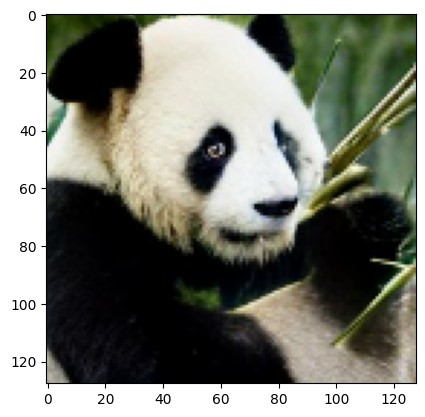

In [11]:
for img_batch, label_batch in test_data.take(1):
    
    image = img_batch[0].numpy().astype('uint8')
    label = label_batch[0].numpy()
    
    print('first img to predict ')
    plt.imshow(image)
    print('actual label: ',Class_names[label])
    
    batch_prediction = model.predict(img_batch)
    print('predicted batch: ',Class_names[np.argmax(batch_prediction[0])])

In [12]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = Class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 60ms/step


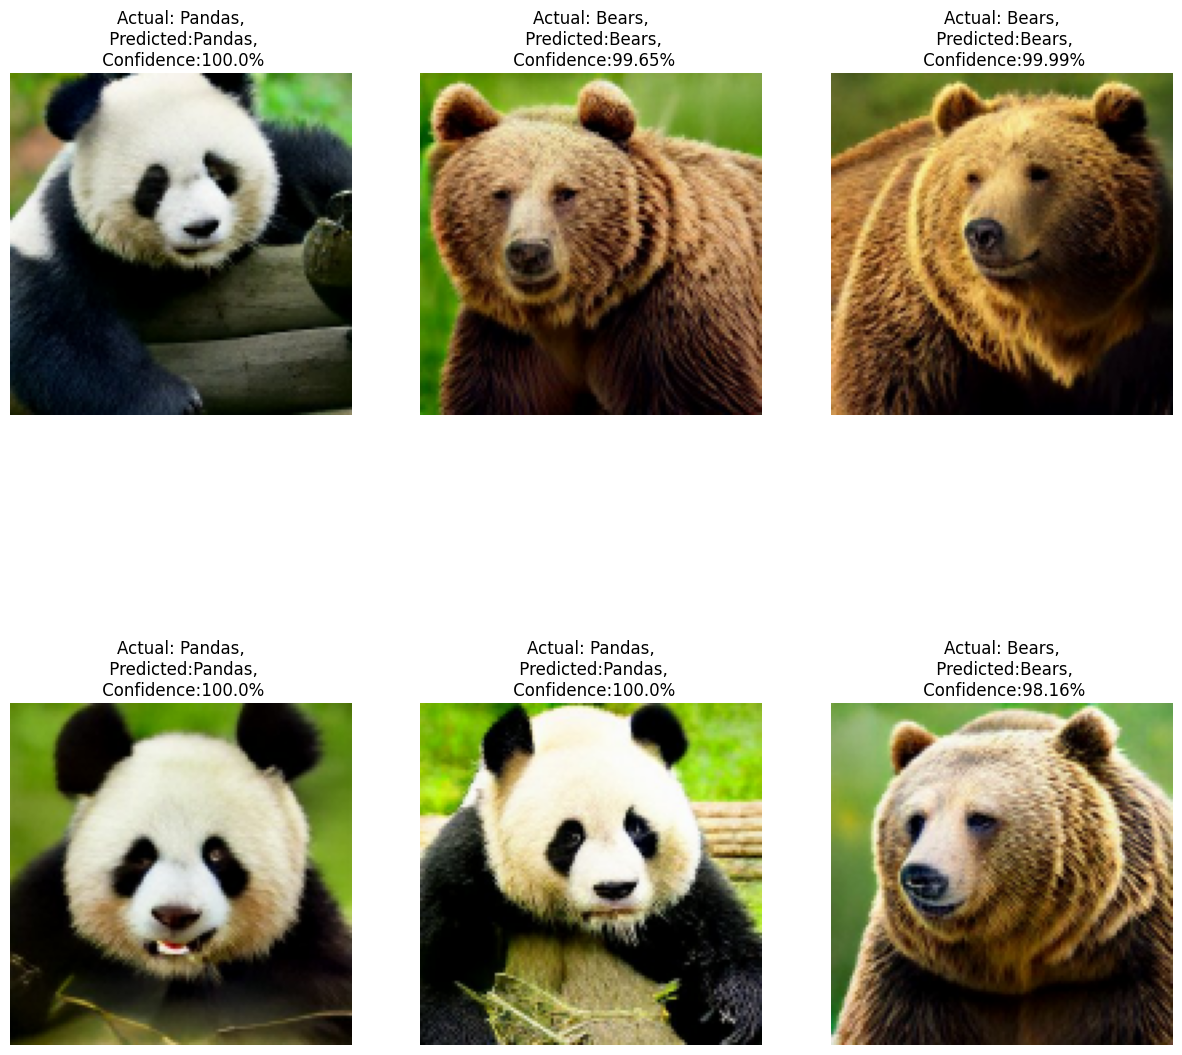

In [14]:
plt.figure(figsize=(15,15))
for images, labels in test_data.take(1):
    for i in range(6):
        ax=plt.subplot(2,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis(False)
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = Class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted:{predicted_class},\n Confidence:{confidence}%")

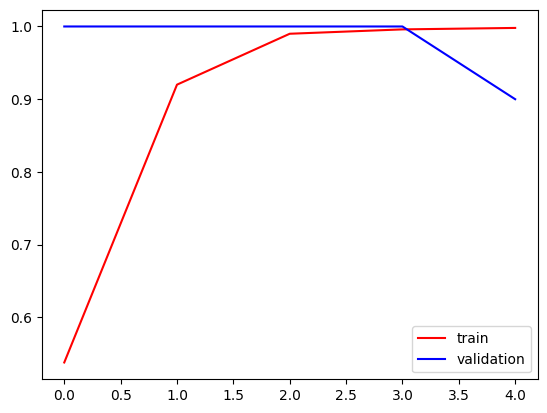

In [15]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

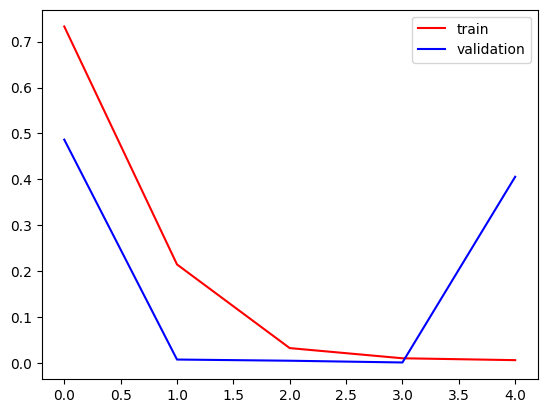

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
model.save("pandabear.h5")